In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Data Wrangling and Setting Up

In [4]:
df15 = pd.read_csv("/content/2015.csv")
df16 = pd.read_csv("/content/2016.csv")
df17 = pd.read_csv("/content/2017.csv")
df18 = pd.read_csv("/content/2018.csv")
df19 = pd.read_csv("/content/2019.csv")

In [ ]:
#checking for isnull and duplicate entries
df15.isnull().sum()

In [ ]:
df15.duplicated().sum()

## Data Analysis 2015 Dataset


In [5]:
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
#conducting different tests to see correlation
correlation = df15["Health (Life Expectancy)"].corr(df15["Happiness Score"])
print(f"Correlation between Life Expectancy and Happiness Score: {correlation:.2f}")


Correlation between Life Expectancy and Happiness Score: 0.72


In [7]:
contingency_table = pd.crosstab(df15['Region'], df15['Health (Life Expectancy)'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Region and Life Expectancy.")
else:
    print("There is no significant correlation between Region and Life Expectancy.")
p

There is no significant correlation between Region and Life Expectancy.


0.36286539667287554

In [8]:
contingency_table = pd.crosstab(df15['Region'], df15['Happiness Score'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Region and Happiness Score.")
else:
    print("There is no significant correlation between Region and Happiness Score.")
p

There is no significant correlation between Region and Happiness Score.


0.4107040079831256

In [9]:
contingency_table = pd.crosstab(df15['Generosity'], df15['Happiness Score'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Generosity and Happiness Score.")
else:
    print("There is no significant correlation between Generosity and Happiness Score.")
p

There is no significant correlation between Generosity and Happiness Score.


0.239978761671775

In [10]:
contingency_table = pd.crosstab(df15['Region'], df15['Family'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Region and Family Size.")
else:
    print("There is no significant correlation between Region and Family Size.")


There is no significant correlation between Region and Family Size.


In [11]:
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [12]:
regions = df15['Region'].values
regions = list(set(regions))
regions

['Western Europe',
 'Eastern Asia',
 'Southeastern Asia',
 'Australia and New Zealand',
 'Central and Eastern Europe',
 'Southern Asia',
 'Latin America and Caribbean',
 'Sub-Saharan Africa',
 'North America',
 'Middle East and Northern Africa']

In [13]:
regions_list2015 = ['Western Europe', 'North America', 'Southern Asia', 'Latin America and Caribbean', 'Eastern Asia', 'Sub-Saharan Africa', 'Central and Eastern Europe', 'Middle East and Northern Africa', 'Australia and New Zealand', 'Southeastern Asia']

region_hs2015 = {}

for region in regions_list2015:
    region_hs2015[region] = df15[df15['Region'] == region]['Happiness Score'].mean()

for region, score in region_hs2015.items():
    print(f"Average Happiness Score in {region}: {score:.2f}")


Average Happiness Score in Western Europe: 6.69
Average Happiness Score in North America: 7.27
Average Happiness Score in Southern Asia: 4.58
Average Happiness Score in Latin America and Caribbean: 6.14
Average Happiness Score in Eastern Asia: 5.63
Average Happiness Score in Sub-Saharan Africa: 4.20
Average Happiness Score in Central and Eastern Europe: 5.33
Average Happiness Score in Middle East and Northern Africa: 5.41
Average Happiness Score in Australia and New Zealand: 7.29
Average Happiness Score in Southeastern Asia: 5.32


In [14]:
region_hs2015

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Southern Asia': 4.580857142857143,
 'Latin America and Caribbean': 6.1446818181818195,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Central and Eastern Europe': 5.332931034482757,
 'Middle East and Northern Africa': 5.406899999999999,
 'Australia and New Zealand': 7.285,
 'Southeastern Asia': 5.317444444444444}

In [15]:
global_avg_hs2015 = df15["Happiness Score"].mean()
global_avg_hs2015

5.375734177215189

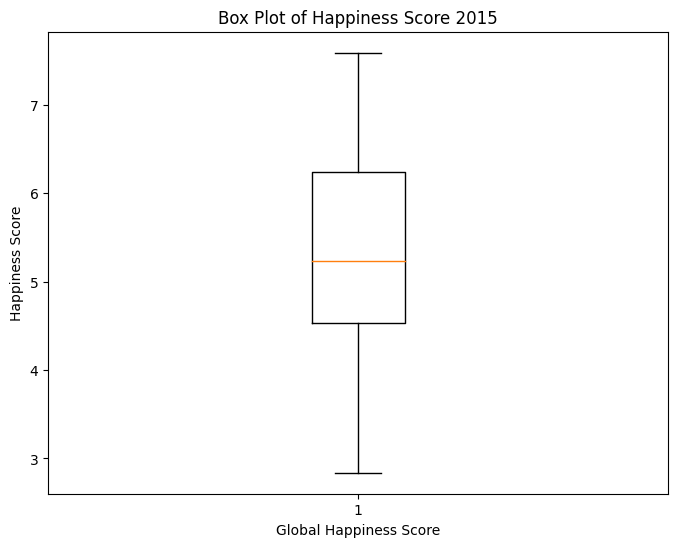

In [16]:
plt.figure(figsize=(8, 6))
plt.boxplot(df15["Happiness Score"])
plt.title("Box Plot of Happiness Score 2015")
plt.ylabel("Happiness Score")
plt.xlabel("Global Happiness Score")
plt.show()


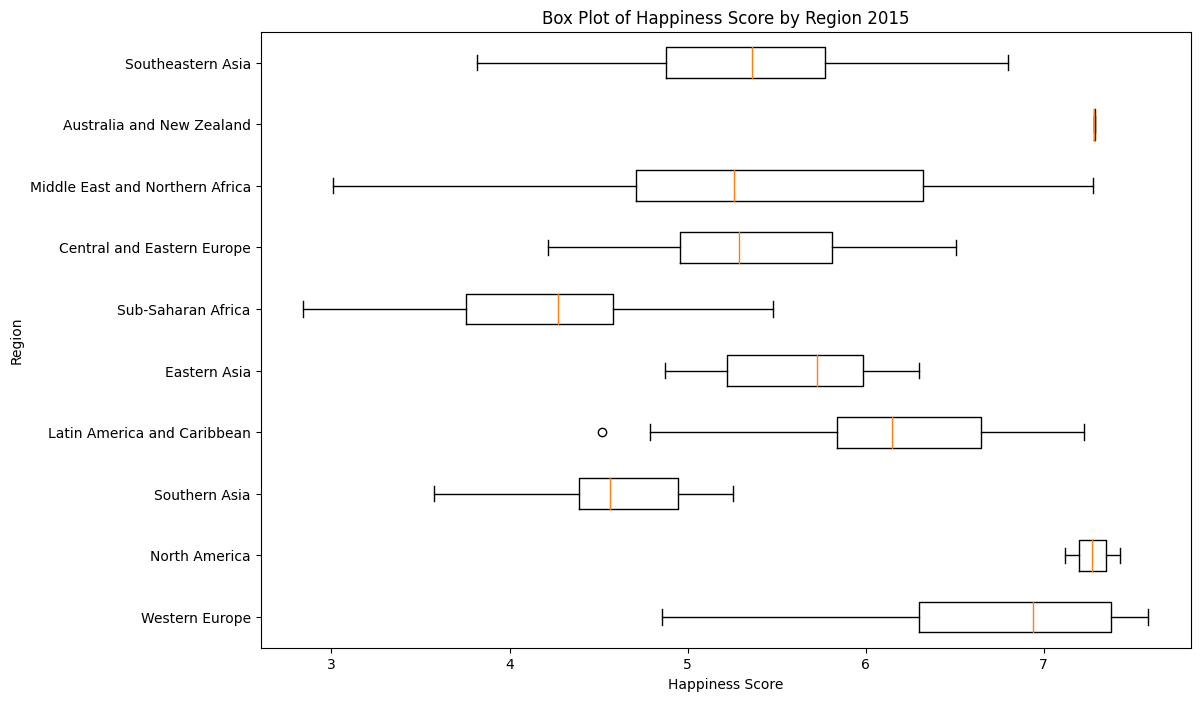

In [17]:
#plotting box plots to visualise Happiness Score Distribution
regions_list2015 = ['Western Europe', 'North America', 'Southern Asia', 'Latin America and Caribbean', 'Eastern Asia', 'Sub-Saharan Africa', 'Central and Eastern Europe', 'Middle East and Northern Africa', 'Australia and New Zealand', 'Southeastern Asia']


happiness_scores_by_region2015 = []

for region in regions_list2015:
    happiness_scores = df15[df15['Region'] == region]['Happiness Score']
    happiness_scores_by_region2015.append(happiness_scores)


plt.figure(figsize=(12, 8))
plt.boxplot(happiness_scores_by_region2015, labels=regions_list2015, vert=False)
plt.title("Box Plot of Happiness Score by Region 2015")
plt.xlabel("Happiness Score")
plt.ylabel("Region")
plt.show()


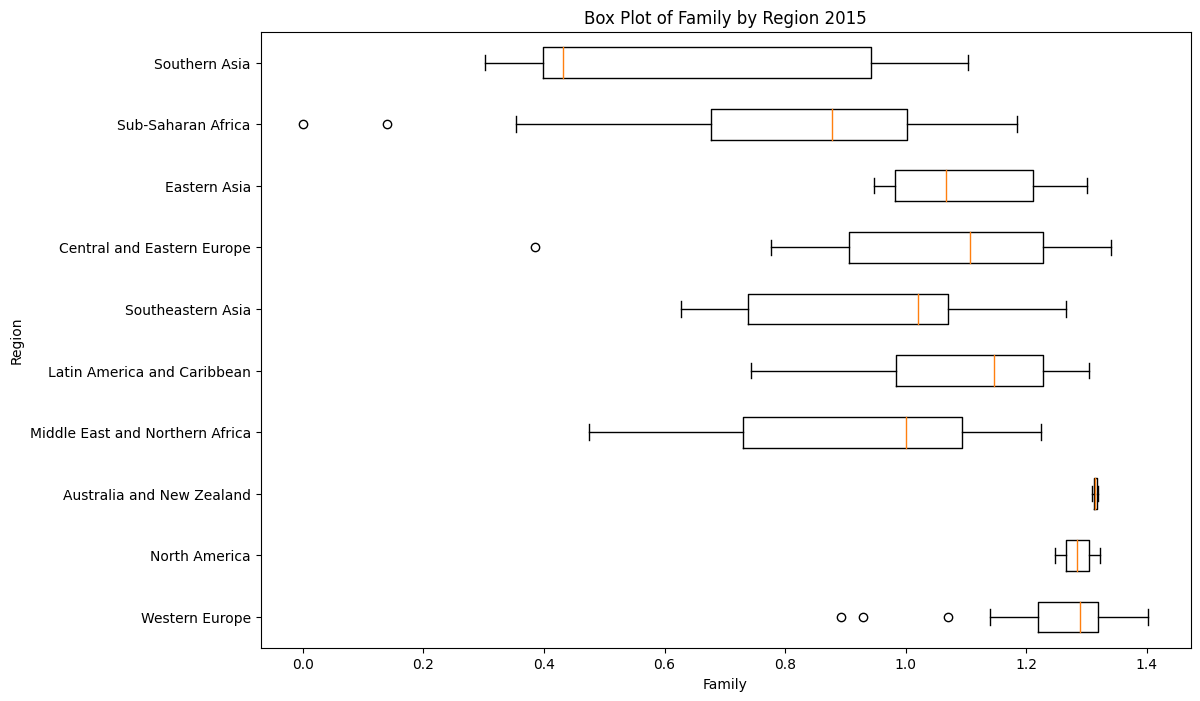

In [18]:
regions_list2015 = df15['Region'].unique()

# Create a list to store "Family" values for each region
family_values_by_region15 = []

# Extract "Family" values for each region
for region in regions_list2015:
    family_values15 = df15[df15['Region'] == region]['Family']
    family_values_by_region15.append(family_values15)

# Create a box plot
plt.figure(figsize=(12, 8))
plt.boxplot(family_values_by_region15, labels=regions_list2015, vert=False)
plt.title("Box Plot of Family by Region 2015")
plt.xlabel("Family")
plt.ylabel("Region")
plt.show()


In [19]:
regions_list2015 = ['Southern Asia', 'Middle East and Northern Africa', 'Australia and New Zealand', 'North America', 'Latin America and Caribbean', 'Southeastern Asia', 'Eastern Asia', 'Central and Eastern Europe', 'Sub-Saharan Africa','Western Europe']

region_family2015 = {}

for region in regions_list2015:
    region_family2015[region] = df15[df15['Region'] == region]['Family'].mean()

for region, score in region_family2015.items():
    print(f"Average Family size in {region}: {score:.2f}")

Average Family size in Southern Asia: 0.65
Average Family size in Middle East and Northern Africa: 0.92
Average Family size in Australia and New Zealand: 1.31
Average Family size in North America: 1.28
Average Family size in Latin America and Caribbean: 1.10
Average Family size in Southeastern Asia: 0.94
Average Family size in Eastern Asia: 1.10
Average Family size in Central and Eastern Europe: 1.05
Average Family size in Sub-Saharan Africa: 0.81
Average Family size in Western Europe: 1.25


## Summary and Results 2015 Dataset

From the first dataset dating 2015, using chi2 square testing we were able to determine the following:


1.   There is no significant correlation between Region and Life Expectancy.
2.   There is no significant correlation between Region and Happiness Score.
3.   There is no significant correlation between Generosity and Happiness Score.
4.   There is no significant correlation between Region and Family Size.


However, there is a strong positive correlation between Life Expectancy and Happiness Score, meaning the higher one is the other variable will also be.

We were also able to determine that in 2015, the regions with the highest Happiness Score were Australia and New Zealand (average score of 7.29) followed by North America (average score of 7.27). Whilst the least content regions were Sub Saharan Africa (average score of 4.20) and Southern Asia (average happiness score of 4.58). Additionally we were able to visualise the spread of the Happiness Scores in the form of box plots to deepen our understanding of the subject.

The data also showed that Australia and New Zealand region had the highest average for family size (1.31 children on average), meaning the amount of children to one family. Whilst the lowest being Southern Asia (0.65 children on average)







## Data Analysis 2016 Dataset

In [20]:
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [21]:
#conducting different tests to see correlation
correlation = df16["Health (Life Expectancy)"].corr(df16["Happiness Score"])
print(f"Correlation between Life Expectancy and Happiness Score: {correlation:.2f}")


Correlation between Life Expectancy and Happiness Score: 0.77


In [22]:
contingency_table = pd.crosstab(df16['Region'], df16['Health (Life Expectancy)'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Region and Life Expectancy.")
else:
    print("There is no significant correlation between Region and Life Expectancy.")
p

There is no significant correlation between Region and Life Expectancy.


0.41576402625516345

In [23]:
contingency_table = pd.crosstab(df16['Region'], df16['Happiness Score'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Region and Happiness Score.")
else:
    print("There is no significant correlation between Region and Happiness Score.")
p

There is no significant correlation between Region and Happiness Score.


0.47220482654413354

In [24]:
contingency_table = pd.crosstab(df16['Generosity'], df16['Happiness Score'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Generosity and Happiness Score.")
else:
    print("There is no significant correlation between Generosity and Happiness Score.")
p

There is no significant correlation between Generosity and Happiness Score.


0.24139146678520054

In [25]:
contingency_table = pd.crosstab(df16['Region'], df16['Family'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Region and Family Size.")
else:
    print("There is no significant correlation between Region and Family Size.")

There is no significant correlation between Region and Family Size.


In [26]:
global_avg_hs2016 = df16["Happiness Score"].mean()
global_avg_hs2016

5.382184713375795

In [27]:
regions2016 = df16['Region'].values
regions2016 = list(set(regions))
regions2016

['Eastern Asia',
 'Southeastern Asia',
 'North America',
 'Australia and New Zealand',
 'Central and Eastern Europe',
 'Southern Asia',
 'Latin America and Caribbean',
 'Sub-Saharan Africa',
 'Western Europe',
 'Middle East and Northern Africa']

In [28]:
regions_list2016 = ['Southern Asia', 'Middle East and Northern Africa', 'Australia and New Zealand', 'North America', 'Latin America and Caribbean', 'Southeastern Asia', 'Eastern Asia', 'Central and Eastern Europe', 'Sub-Saharan Africa','Western Europe']

region_hs2016 = {}

for region in regions_list2016:
    region_hs2016[region] = df16[df16['Region'] == region]['Happiness Score'].mean()

for region, score in region_hs2016.items():
    print(f"Average Happiness Score in {region}: {score:.2f}")

Average Happiness Score in Southern Asia: 4.56
Average Happiness Score in Middle East and Northern Africa: 5.39
Average Happiness Score in Australia and New Zealand: 7.32
Average Happiness Score in North America: 7.25
Average Happiness Score in Latin America and Caribbean: 6.10
Average Happiness Score in Southeastern Asia: 5.34
Average Happiness Score in Eastern Asia: 5.62
Average Happiness Score in Central and Eastern Europe: 5.37
Average Happiness Score in Sub-Saharan Africa: 4.14
Average Happiness Score in Western Europe: 6.69


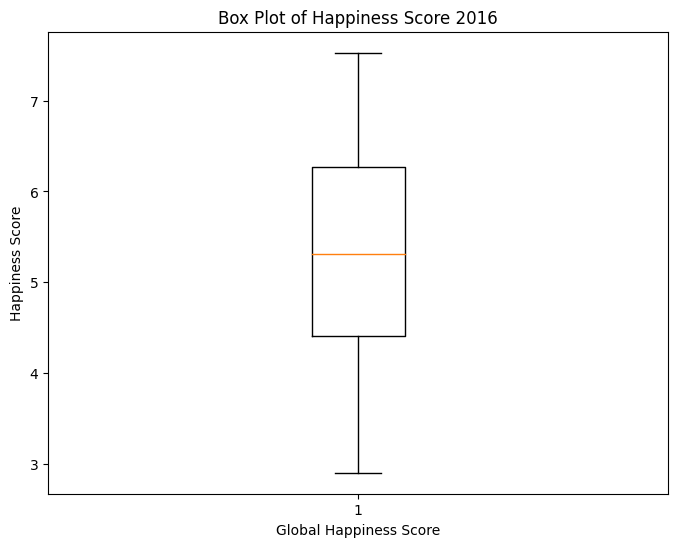

In [29]:
plt.figure(figsize=(8, 6))
plt.boxplot(df16["Happiness Score"])
plt.title("Box Plot of Happiness Score 2016")
plt.ylabel("Happiness Score")
plt.xlabel("Global Happiness Score")
plt.show()

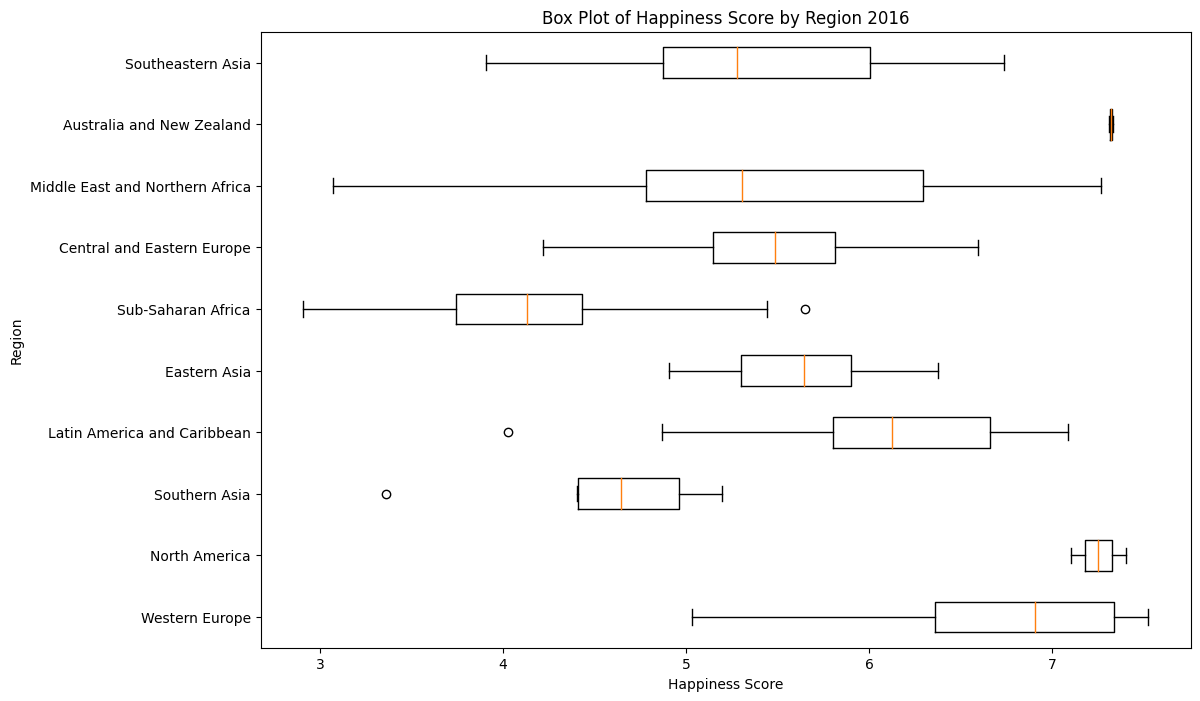

In [30]:
#plotting box plots to visualise Happiness Score Distribution
regions_list2016 = ['Western Europe', 'North America', 'Southern Asia', 'Latin America and Caribbean', 'Eastern Asia', 'Sub-Saharan Africa', 'Central and Eastern Europe', 'Middle East and Northern Africa', 'Australia and New Zealand', 'Southeastern Asia']


happiness_scores_by_region2016 = []

for region in regions_list2016:
    happiness_scores = df16[df16['Region'] == region]['Happiness Score']
    happiness_scores_by_region2016.append(happiness_scores)


plt.figure(figsize=(12, 8))
plt.boxplot(happiness_scores_by_region2016, labels=regions_list2016, vert=False)
plt.title("Box Plot of Happiness Score by Region 2016")
plt.xlabel("Happiness Score")
plt.ylabel("Region")
plt.show()

In [31]:
regions_list2016 = ['Western Europe', 'North America', 'Southern Asia', 'Latin America and Caribbean', 'Eastern Asia', 'Sub-Saharan Africa', 'Central and Eastern Europe', 'Middle East and Northern Africa', 'Australia and New Zealand', 'Southeastern Asia']

region_family2016 = {}

for region in regions_list2016:
    region_family2016[region] = df16[df16['Region'] == region]['Family'].mean()

for region, score in region_family2016.items():
    print(f"Average Family size in {region}: {score:.2f}")

Average Family size in Western Europe: 1.04
Average Family size in North America: 1.07
Average Family size in Southern Asia: 0.48
Average Family size in Latin America and Caribbean: 0.90
Average Family size in Eastern Asia: 0.91
Average Family size in Sub-Saharan Africa: 0.59
Average Family size in Central and Eastern Europe: 0.86
Average Family size in Middle East and Northern Africa: 0.70
Average Family size in Australia and New Zealand: 1.14
Average Family size in Southeastern Asia: 0.79


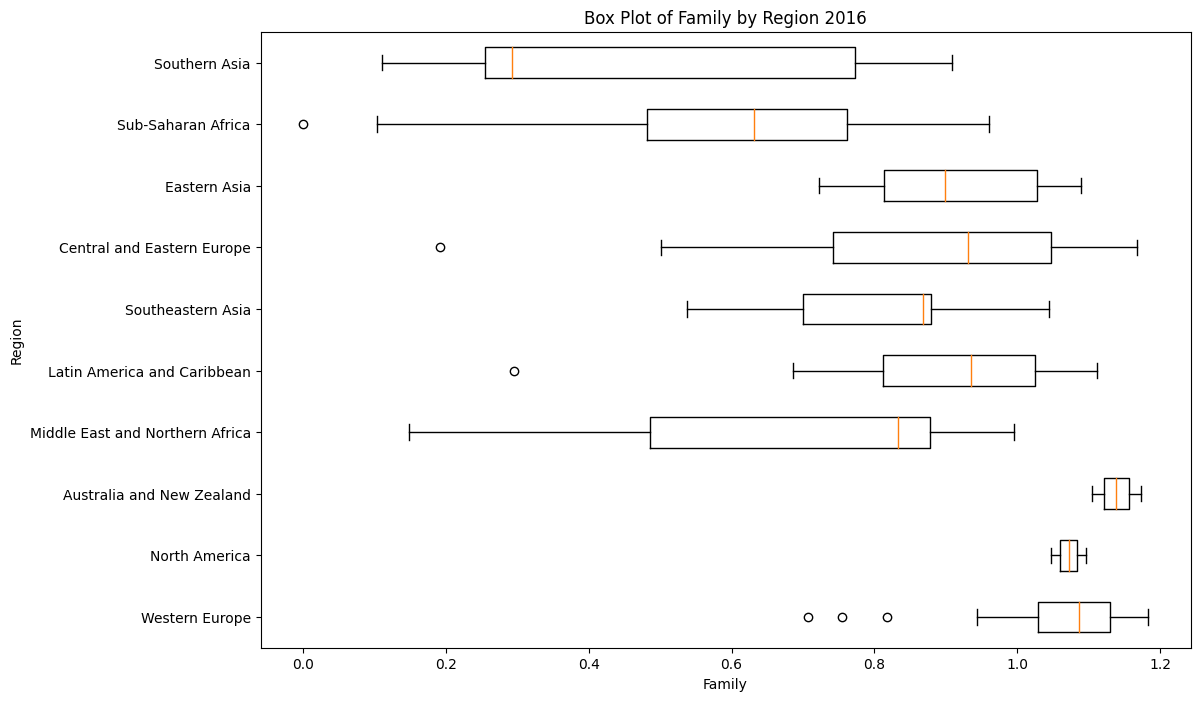

In [32]:
#plotting box plots to visualise Family distribution by region
unique_regions16 = df16['Region'].unique()

family_values_by_region16 = []


for region in unique_regions16:
    family_values16 = df16[df16['Region'] == region]['Family']
    family_values_by_region16.append(family_values16)

# Create a box plot
plt.figure(figsize=(12, 8))
plt.boxplot(family_values_by_region16, labels=unique_regions16, vert=False)
plt.title("Box Plot of Family by Region 2016")
plt.xlabel("Family")
plt.ylabel("Region")
plt.show()


## Summary and Results 2016 Dataset

From the 2016 dataset, using chi2 square testing we were able to determine the following:


1.   There is no significant correlation between Region and Life Expectancy.
2.   There is no significant correlation between Region and Happiness Score.
3.   There is no significant correlation between Generosity and Happiness Score.
4.   There is no significant correlation between Region and Family Size.

However, like the 2015 dataset there is a strong positive correlation between Life Expectancy and Happiness Score, meaning the higher one is the other variable will also be.

We were also able to determine that in 2016, the regions with the highest Happiness Score were Australia and New Zealand (average score of 7.32) followed by North America (average score of 7.25). Whilst the least content regions were Sub Saharan Africa (average score of 4.14) and Southern Asia (average happiness score of 4.56). Additionally we were able to visualise the spread of the Happiness Scores in the form of box plots to deepen our understanding of the subject.

The data also showed that Australia and New Zealand region had the highest average for family size (1.14 children on average), meaning the amount of children to one family. Whilst the lowest being Southern Asia (0.48 children on average)


## Data Analysis 2017 Dataset

In [33]:
df17

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [ ]:
country_to_region_df15 = df15.set_index('Country')['Region'].to_dict()

country_to_region_df16 = df16.set_index('Country')['Region'].to_dict()


def map_country_to_region(country):
    if country in country_to_region_df15:
        return country_to_region_df15[country]
    elif country in country_to_region_df16:
        return country_to_region_df16[country]
    else:
        return None

df17['Region'] = df17['Country'].apply(map_country_to_region)

In [ ]:
#conducting different tests to see correlation
correlation = df17["Health..Life.Expectancy."].corr(df17["Happiness.Score"])
print(f"Correlation between Life Expectancy and Happiness Score: {correlation:.2f}")


Correlation between Life Expectancy and Happiness Score: 0.78


In [ ]:
contingency_table = pd.crosstab(df17['Region'], df17['Health..Life.Expectancy.'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Region and Life Expectancy.")
else:
    print("There is no significant correlation between Region and Life Expectancy.")
p

There is no significant correlation between Region and Life Expectancy.


0.426840144027118

In [ ]:
contingency_table = pd.crosstab(df17['Region'], df17['Happiness.Score'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Region and Happiness Score.")
else:
    print("There is no significant correlation between Region and Happiness Score.")
p

There is no significant correlation between Region and Happiness Score.


0.7177790082071672

In [ ]:
contingency_table = pd.crosstab(df17['Generosity'], df17['Happiness.Score'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("There is a significant correlation between Generosity and Happiness Score.")
else:
    print("There is no significant correlation between Generosity and Happiness Score.")
p

There is no significant correlation between Generosity and Happiness Score.


0.24213284067724972

In [ ]:
global_avg_hs2017 = df17["Happiness.Score"].mean()
global_avg_hs2017

5.354019355773926

In [ ]:
df17

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Sub-Saharan Africa
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Middle East and Northern Africa
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Sub-Saharan Africa
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Sub-Saharan Africa


In [ ]:
regions2017 = df17['Region'].values
regions2017 = list(set(regions))
regions2017

['North America',
 'Southeastern Asia',
 'Eastern Asia',
 'Middle East and Northern Africa',
 'Central and Eastern Europe',
 'Southern Asia',
 'Western Europe',
 'Latin America and Caribbean',
 'Australia and New Zealand',
 'Sub-Saharan Africa']

In [ ]:
regions_list2017 = ['Southern Asia',
 'Australia and New Zealand',
 'Middle East and Northern Africa',
 'North America',
 'Latin America and Caribbean',
 'Southeastern Asia',
 'Eastern Asia',
 'Central and Eastern Europe',
 'Sub-Saharan Africa',
 'Western Europe']

region_hs2017 = {}

for region in regions_list2017:
    region_hs2017[region] = df17[df17['Region'] == region]['Happiness.Score'].mean()

for region, score in region_hs2017.items():
    print(f"Average Happiness Score in {region}: {score:.2f}")

Average Happiness Score in Southern Asia: 4.63
Average Happiness Score in Australia and New Zealand: 7.30
Average Happiness Score in Middle East and Northern Africa: 5.37
Average Happiness Score in North America: 7.15
Average Happiness Score in Latin America and Caribbean: 5.96
Average Happiness Score in Southeastern Asia: 5.44
Average Happiness Score in Eastern Asia: 5.50
Average Happiness Score in Central and Eastern Europe: 5.41
Average Happiness Score in Sub-Saharan Africa: 4.11
Average Happiness Score in Western Europe: 6.70


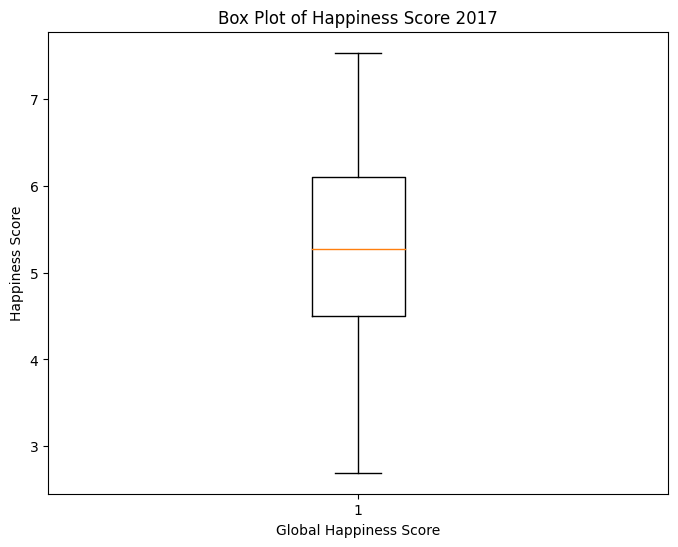

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df17["Happiness.Score"])
plt.title("Box Plot of Happiness Score 2017")
plt.ylabel("Happiness Score")
plt.xlabel("Global Happiness Score")
plt.show()

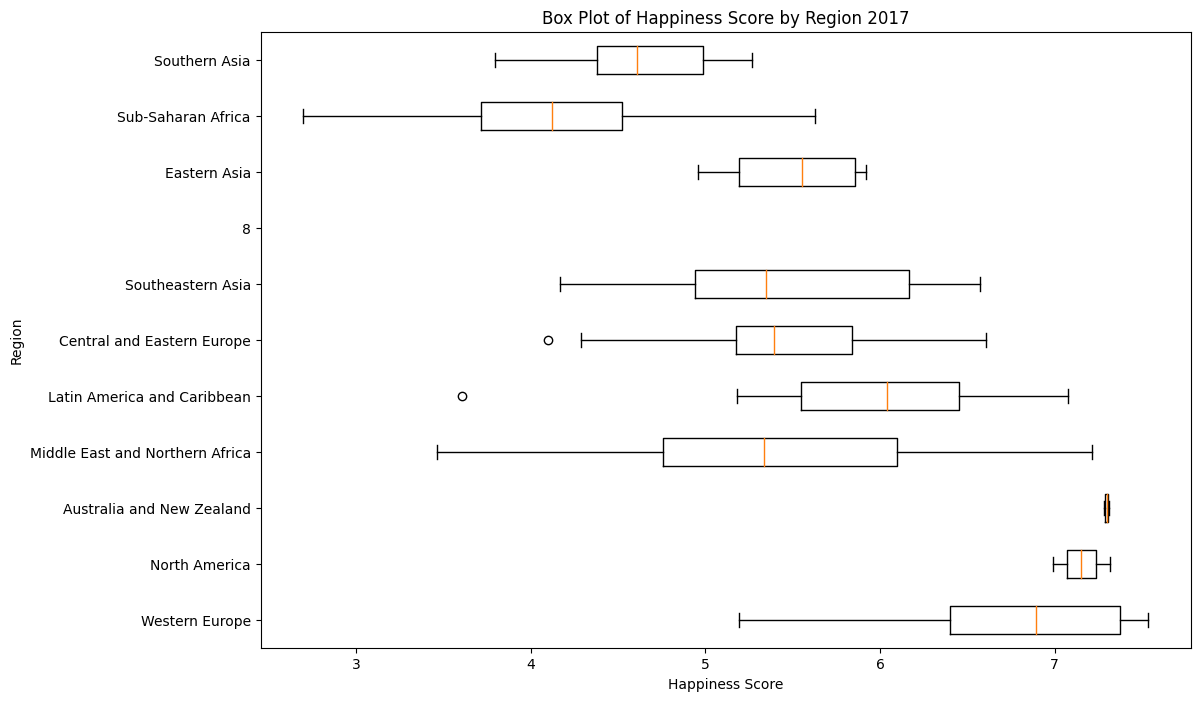

In [ ]:
unique_regions17 = df17['Region'].unique()


happiness_scores_by_region = []

# Extract Happiness Scores for each region
for region in unique_regions17:
    happiness_scores = df17[df17['Region'] == region]['Happiness.Score']
    happiness_scores_by_region.append(happiness_scores)

# Create a box plot
plt.figure(figsize=(12, 8))
plt.boxplot(happiness_scores_by_region, labels=unique_regions17, vert=False)
plt.title("Box Plot of Happiness Score by Region 2017")
plt.xlabel("Happiness Score")
plt.ylabel("Region")
plt.show()







In [ ]:
unique_regions17 = unique_regions17[unique_regions17 != None]
unique_regions17

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeastern Asia', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

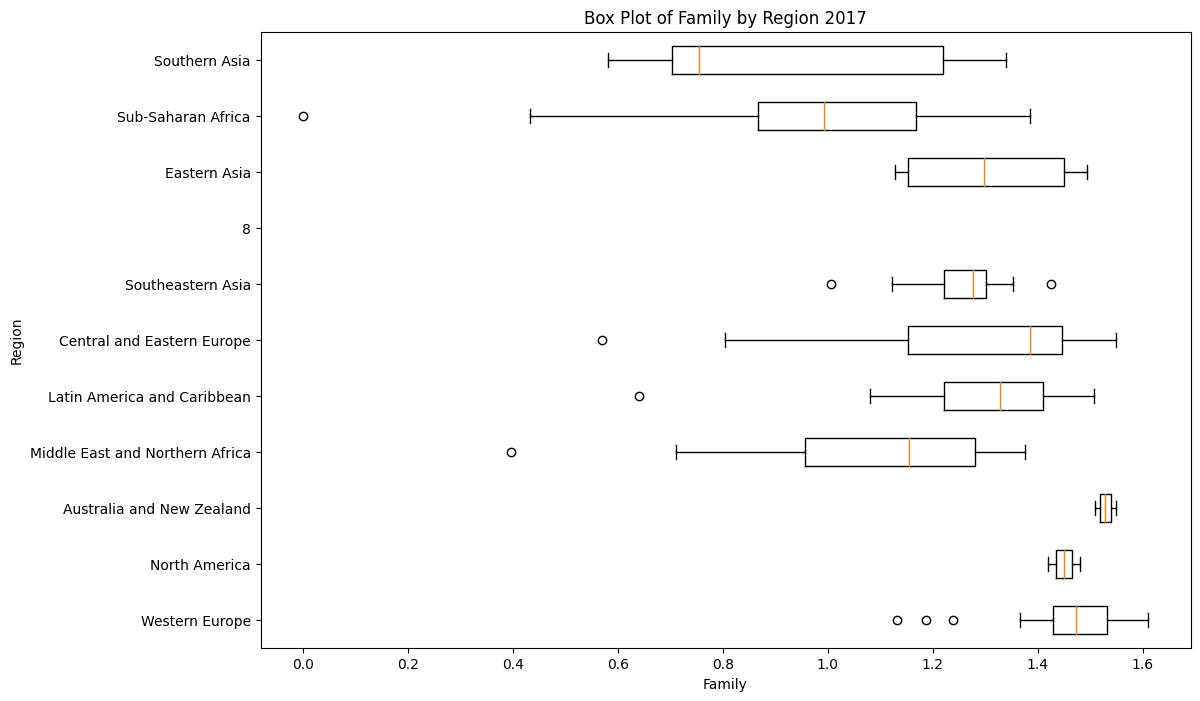

In [ ]:
#plotting box plots to visualise Family distribution by region
unique_regions17 = df17['Region'].unique()

family_values_by_region17 = []


for region in unique_regions16:
    family_values17 = df17[df17['Region'] == region]['Family']
    family_values_by_region17.append(family_values17)

# Create a box plot
plt.figure(figsize=(12, 8))
plt.boxplot(family_values_by_region17, labels=unique_regions17, vert=False)
plt.title("Box Plot of Family by Region 2017")
plt.xlabel("Family")
plt.ylabel("Region")

plt.show()


## Summary and Results 2017

From the 2017 dataset, using chi2 square testing we were able to determine the following:


1.   There is no significant correlation between Region and Life Expectancy.
2.   There is no significant correlation between Region and Happiness Score.
3.   There is no significant correlation between Generosity and Happiness Score.
4.   There is no significant correlation between Region and Family Size.

However, similar to the previous datasets 2015, 2016 there is a strong positive correlation between Life Expectancy and Happiness Score, meaning the higher one is the other variable will also be.

We were also able to determine that in 2017, the regions with the highest Happiness Score were Australia and New Zealand (average score of 7.30) followed by North America (average score of 7.15). Whilst the least content regions were Sub Saharan Africa (average score of 4.11) and Southern Asia (average happiness score of 4.63). Additionally we were able to visualise the spread of the Happiness Scores in the form of box plots to deepen our understanding of the subject.

The data also showed that Australia and New Zealand region had the highest average for family size (1.14 children on average), meaning the amount of children to one family. Whilst the lowest being Southern Asia (0.48 children on average)

## Data Analysis 2018 Dataset

In [ ]:
df18

In [34]:
#adding the region column to the dataset
country_to_region_df15 = df15.set_index('Country')['Region'].to_dict()

country_to_region_df16 = df16.set_index('Country')['Region'].to_dict()

def map_country_to_region(country):
    if country in country_to_region_df15:
        return country_to_region_df15[country]
    elif country in country_to_region_df16:
        return country_to_region_df16[country]
    else:
        return None

df18['Region'] = df18['Country or region'].apply(map_country_to_region)
df18


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Western Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Western Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,Middle East and Northern Africa
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,Sub-Saharan Africa
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,Sub-Saharan Africa
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,Sub-Saharan Africa


In [35]:
correlation = df18['Perceptions of corruption'].corr(df18['Score'])

# Print the correlation value
print(f"Correlation between 'Perceptions of corruption' and 'Score': {correlation:.2f}")

if p < 0.05:
    print("There is a significant correlation between Perceptions of corruption and Happiness Score.")
else:
    print("There is no significant correlation between Perceptions of corruption and Happiness Score.")

Correlation between 'Perceptions of corruption' and 'Score': 0.41
There is no significant correlation between Perceptions of corruption and Happiness Score.


In [36]:
correlation = df18['Freedom to make life choices'].corr(df18['Score'])

# Print the correlation value
print(f"Correlation between 'Freedom to make life choices' and 'Score': {correlation:.2f}")
if p < 0.05:
    print("There is a significant correlation between Freedom to make life choices and Happiness Score.")
else:
    print("There is no significant correlation between Freedom to make life choices and Happiness Score.")

Correlation between 'Freedom to make life choices' and 'Score': 0.54
There is no significant correlation between Freedom to make life choices and Happiness Score.


In [37]:
regions2018 = df18['Region'].values
regions2018 = list(set(regions))
regions2018

['Eastern Asia',
 'Southeastern Asia',
 'North America',
 'Australia and New Zealand',
 'Central and Eastern Europe',
 'Southern Asia',
 'Latin America and Caribbean',
 'Sub-Saharan Africa',
 'Western Europe',
 'Middle East and Northern Africa']

In [ ]:
regions_list2018 = ['North America',
 'Southeastern Asia',
 'Eastern Asia',
 'Middle East and Northern Africa',
 'Central and Eastern Europe',
 'Southern Asia',
 'Western Europe',
 'Latin America and Caribbean',
 'Australia and New Zealand',
 'Sub-Saharan Africa']

region_hs2018 = {}

for region in regions_list2018:
    region_hs2018[region] = df18[df18['Region'] == region]['Happiness.Score'].mean()

for region, score in region_hs2018.items():
    print(f"Average Happiness Score in {region}: {score:.2f}")

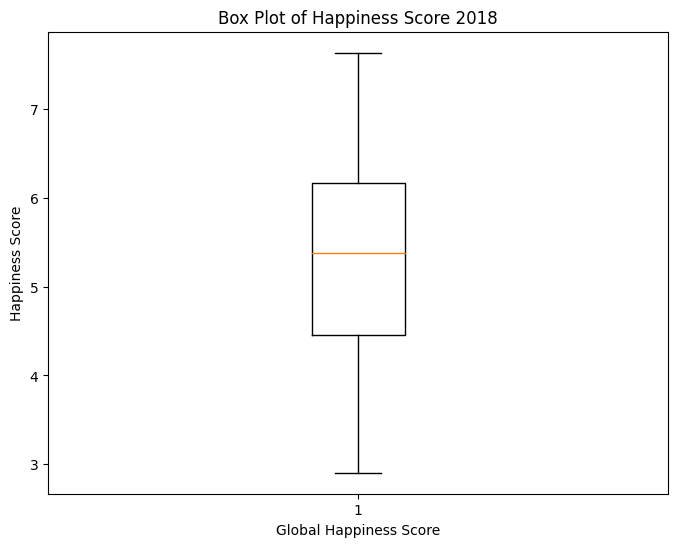

In [38]:
plt.figure(figsize=(8, 6))
plt.boxplot(df18["Score"])
plt.title("Box Plot of Happiness Score 2018")
plt.ylabel("Happiness Score")
plt.xlabel("Global Happiness Score")
plt.show()

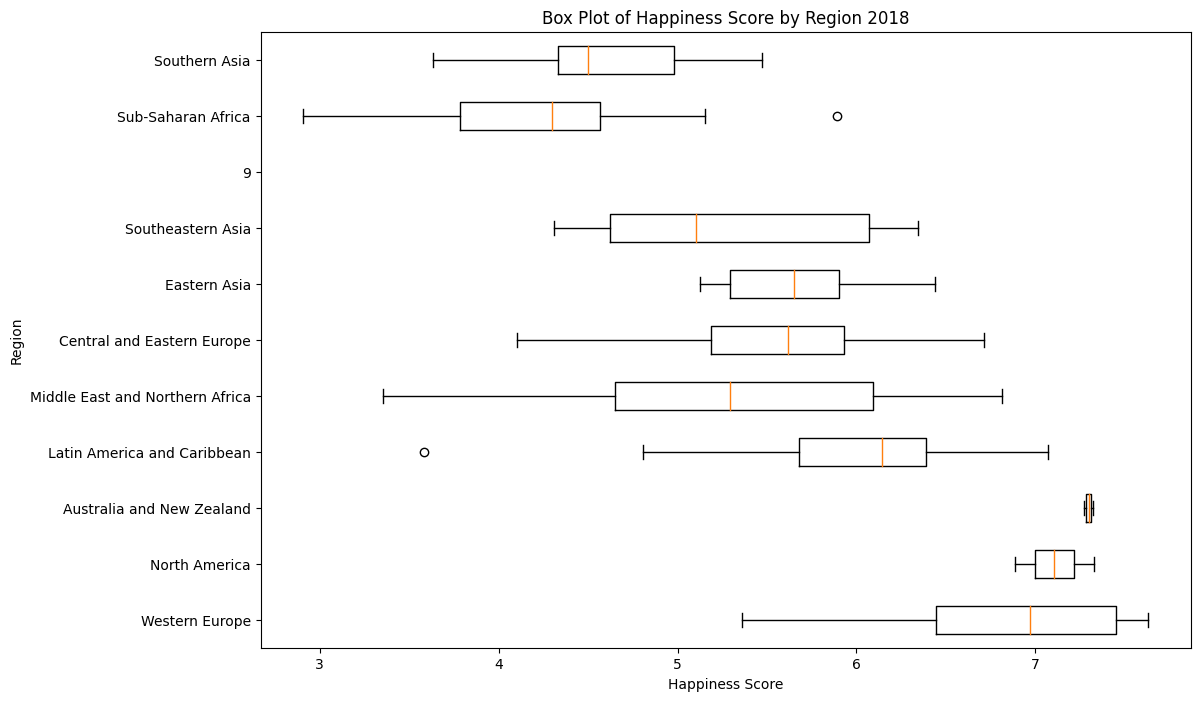

In [ ]:
unique_regions18 = df18['Region'].unique()


happiness_scores_by_region2018 = []

# Extract Happiness Scores for each region
for region in unique_regions18:
    happiness_scores2018 = df18[df18['Region'] == region]['Score']
    happiness_scores_by_region2018.append(happiness_scores2018)

# Create a box plot
plt.figure(figsize=(12, 8))
plt.boxplot(happiness_scores_by_region2018, labels=unique_regions18, vert=False)
plt.title("Box Plot of Happiness Score by Region 2018")
plt.xlabel("Happiness Score")
plt.ylabel("Region")
plt.show()


## Summary and Results 2018

From the 2018 dataset, using chi2 square testing we were able to determine the
following:


1.   There is no significant correlation between Perceptions of corruption and Happiness Score.
2.   There is no significant correlation between Freedom to make life choices and Happiness Score.
3.   There is no significant correlation between Healthy life expectancy and Happiness Score.
4.   There is no significant correlation between Social support and Happiness Score.

However, similar to the previous datasets 2015, 2016, 2017 there is a strong positive correlation between Life Expectancy and Happiness Score, meaning the higher one is the other variable will also be.

We were also able to determine that in 2018, the regions with the highest Happiness Score were Australia and New Zealand followed by North America . Whilst the least content regions were Sub Saharan Africa  and Southern Asia. Additionally we were able to visualise the spread of the Happiness Scores in the form of box plots to deepen our understanding of the subject.

## Data Analysis 2019 Dataset


In [48]:
df19

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [49]:
#adding the region column to the dataset
country_to_region_df15 = df15.set_index('Country')['Region'].to_dict()

country_to_region_df16 = df16.set_index('Country')['Region'].to_dict()

def map_country_to_region(country):
    if country in country_to_region_df15:
        return country_to_region_df15[country]
    elif country in country_to_region_df16:
        return country_to_region_df16[country]
    else:
        return None

df19['Region'] = df19['Country or region'].apply(map_country_to_region)
df19


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Southern Asia
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Sub-Saharan Africa


In [52]:
correlation = df19['Perceptions of corruption'].corr(df19['Score'])

# Print the correlation value
print(f"Correlation between 'Perceptions of corruption' and 'Score': {correlation:.2f}")

if p < 0.05:
    print("There is a significant correlation between Perceptions of corruption and Happiness Score.")
else:
    print("There is no significant correlation between Perceptions of corruption and Happiness Score.")

Correlation between 'Perceptions of corruption' and 'Score': 0.39
There is no significant correlation between Perceptions of corruption and Happiness Score.


In [53]:
correlation = df19['Freedom to make life choices'].corr(df19['Score'])

# Print the correlation value
print(f"Correlation between 'Freedom to make life choices' and 'Score': {correlation:.2f}")
if p < 0.05:
    print("There is a significant correlation between Freedom to make life choices and Happiness Score.")
else:
    print("There is no significant correlation between Freedom to make life choices and Happiness Score.")

Correlation between 'Freedom to make life choices' and 'Score': 0.57
There is no significant correlation between Freedom to make life choices and Happiness Score.


In [54]:
correlation = df19['Healthy life expectancy'].corr(df19['Score'])

# Print the correlation value
print(f"Correlation between 'Healthy life expectancy' and 'Score': {correlation:.2f}")

if p < 0.05:
    print("There is a significant correlation between Healthy life expectancy and Happiness Score.")
else:
    print("There is no significant correlation between Healthy life expectancy and Happiness Score.")

Correlation between 'Healthy life expectancy' and 'Score': 0.78
There is no significant correlation between Healthy life expectancy and Happiness Score.


In [55]:
correlation = df19['Social support'].corr(df19['Score'])

# Print the correlation value
print(f"Correlation between 'Social support' and 'Score': {correlation:.2f}")

if p < 0.05:
    print("There is a significant correlation between Social support and Happiness Score.")
else:
    print("There is no significant correlation between Social support and Happiness Score.")

Correlation between 'Social support' and 'Score': 0.78
There is no significant correlation between Social support and Happiness Score.


In [56]:
regions2019 = df19['Region'].values
regions2019 = list(set(regions))
regions2019

['Eastern Asia',
 'Southeastern Asia',
 'North America',
 'Australia and New Zealand',
 'Central and Eastern Europe',
 'Southern Asia',
 'Latin America and Caribbean',
 'Sub-Saharan Africa',
 'Western Europe',
 'Middle East and Northern Africa']

In [57]:
regions_list2019 = ['Eastern Asia',
 'Southeastern Asia',
 'North America',
 'Australia and New Zealand',
 'Central and Eastern Europe',
 'Southern Asia',
 'Latin America and Caribbean',
 'Sub-Saharan Africa',
 'Western Europe',
 'Middle East and Northern Africa']

region_hs2019 = {}

for region in regions_list2019:
    region_hs2019[region] = df19[df19['Region'] == region]['Score'].mean()

for region, score in region_hs2019.items():
    print(f"Average Happiness Score in {region}: {score:.2f}")

Average Happiness Score in Eastern Asia: 5.69
Average Happiness Score in Southeastern Asia: 5.27
Average Happiness Score in North America: 7.08
Average Happiness Score in Australia and New Zealand: 7.27
Average Happiness Score in Central and Eastern Europe: 5.57
Average Happiness Score in Southern Asia: 4.53
Average Happiness Score in Latin America and Caribbean: 5.94
Average Happiness Score in Sub-Saharan Africa: 4.29
Average Happiness Score in Western Europe: 6.90
Average Happiness Score in Middle East and Northern Africa: 5.24


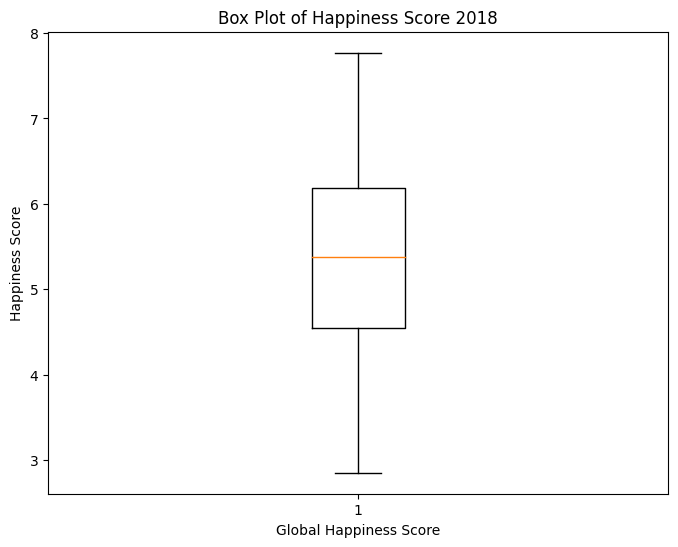

In [58]:
plt.figure(figsize=(8, 6))
plt.boxplot(df19["Score"])
plt.title("Box Plot of Happiness Score 2018")
plt.ylabel("Happiness Score")
plt.xlabel("Global Happiness Score")
plt.show()

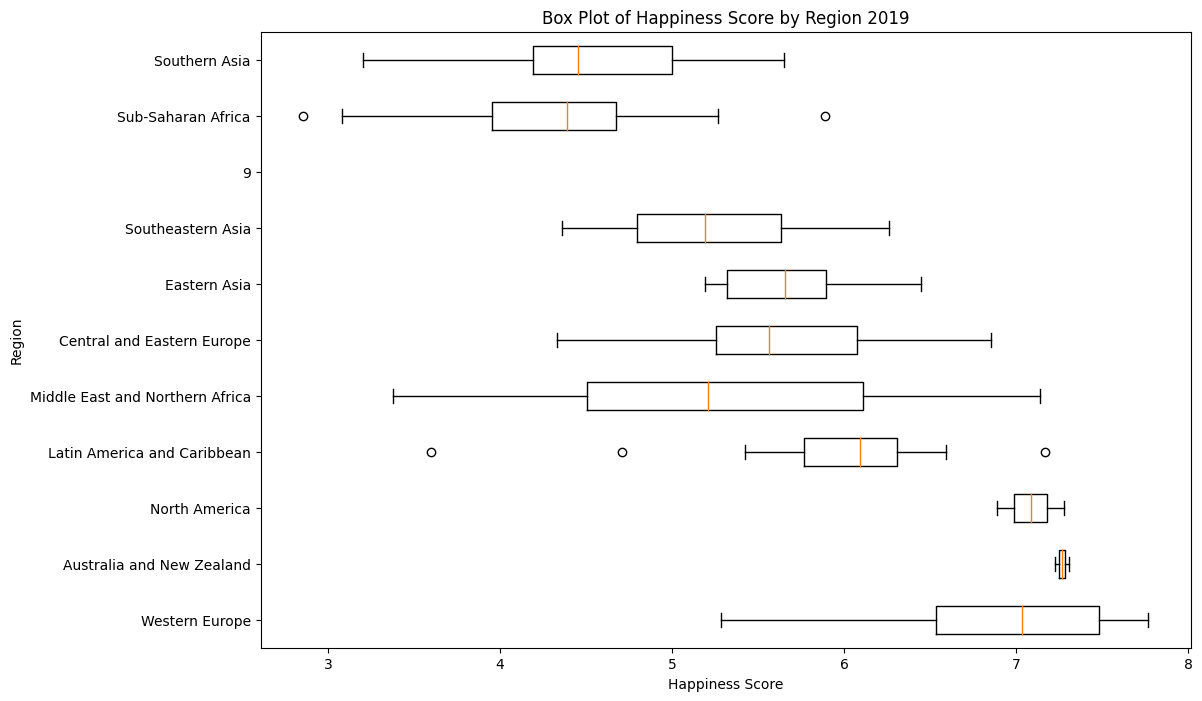

In [59]:
unique_regions19 = df19['Region'].unique()


happiness_scores_by_region2019 = []

# Extract Happiness Scores for each region
for region in unique_regions19:
    happiness_scores2019 = df19[df19['Region'] == region]['Score']
    happiness_scores_by_region2019.append(happiness_scores2019)

# Create a box plot
plt.figure(figsize=(12, 8))
plt.boxplot(happiness_scores_by_region2019, labels=unique_regions19, vert=False)
plt.title("Box Plot of Happiness Score by Region 2019")
plt.xlabel("Happiness Score")
plt.ylabel("Region")
plt.show()

## Summary and Results 2019

From the 2019 dataset, using chi2 square testing we were able to determine the
following:


1.   There is no significant correlation between Perceptions of corruption and Happiness Score.
2.   There is no significant correlation between Freedom to make life choices and Happiness Score.
3.   There is no significant correlation between Healthy life expectancy and Happiness Score.
4.   There is no significant correlation between Social support and Happiness Score.

However, similar to the previous datasets 2015, 2016, 2017, 2018 there is a strong positive correlation between Life Expectancy and Happiness Score, meaning the higher one is the other variable will also be.

We were also able to determine that in 2017, the regions with the highest Happiness Score were Australia and New Zealand followed by North America . Whilst the least content regions were Sub Saharan Africa  and Southern Asia. Additionally we were able to visualise the spread of the Happiness Scores in the form of box plots to deepen our understanding of the subject.